In [1]:
# Model 

!wget http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/mpi/pose_iter_160000.caffemodel -O pose.caffemodel

--2018-11-07 22:30:42--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/mpi/pose_iter_160000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.176.37
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.176.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205950363 (196M) [text/plain]
Saving to: ‘pose.caffemodel’

pose.caffemodel     100%[===================>] 196.41M  5.09MB/s    in 39s     

2018-11-07 22:31:21 (5.08 MB/s) - ‘pose.caffemodel’ saved [205950363/205950363]



In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

In [3]:
print(cv2.__version__)

3.4.2


In [4]:
ls

federer.jpg  paper.pdf    points.png       Pose Estimation.ipynb  README.md
output.png   pitcher.jpg  pose.caffemodel  pose.prototxt


In [5]:
protoFile = 'pose.prototxt'
weightsFile = 'pose.caffemodel'

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [6]:
def draw_points(filenames, net, point_labels):
    
    for point_label in point_labels:
        print(point_label)
    
    plt.figure(figsize=(16,9))
    
    for idx, filename in enumerate(filenames):
        
        frame = cv2.imread(filename)

        frameHeight, frameWidth, _ = frame.shape

        inWidth = 368
        inHeight = 368

        inpBlob = cv2.dnn.blobFromImage(frame, 1./255, (inWidth, inHeight), 
                                        (0, 0, 0), swapRB=False, crop=False)

        net.setInput(inpBlob)
        
        output = net.forward()
        
        H = output.shape[2]
        W = output.shape[3]
        points = []
        threshold = .1
        nPoints = 18

        for i in range(nPoints):
            probMap = output[0, i, :, :]

            minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

            x = (frameWidth * point[0]) / W
            y = (frameHeight * point[1]) / H

            if prob > threshold : 
                cv2.circle(frame, (int(x), int(y)), 15, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
                cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 3, lineType=cv2.LINE_AA)

                points.append((int(x), int(y)))
            else :
                points.append(None)

        frame_rgb = frame[..., ::-1]
        
        plt.subplot(len(filenames), 1, idx+1)
        plt.imshow(frame_rgb)
        plt.axis('off')
        
    plt.show()
    cv2.destroyAllWindows()        
        

In [7]:
point_labels = ['Head – 0', 'Neck – 1', 'Right Shoulder – 2', 
                'Right Elbow – 3', 'Right Wrist – 4',
                'Left Shoulder – 5', 'Left Elbow – 6', 
                'Left Wrist – 7', 'Right Hip – 8',
                'Right Knee – 9', 'Right Ankle – 10', 
                'Left Hip – 11', 'Left Knee – 12',
                'Left Ankle – 13', 'Chest – 14', 'Background – 15']

Head – 0
Neck – 1
Right Shoulder – 2
Right Elbow – 3
Right Wrist – 4
Left Shoulder – 5
Left Elbow – 6
Left Wrist – 7
Right Hip – 8
Right Knee – 9
Right Ankle – 10
Left Hip – 11
Left Knee – 12
Left Ankle – 13
Chest – 14
Background – 15


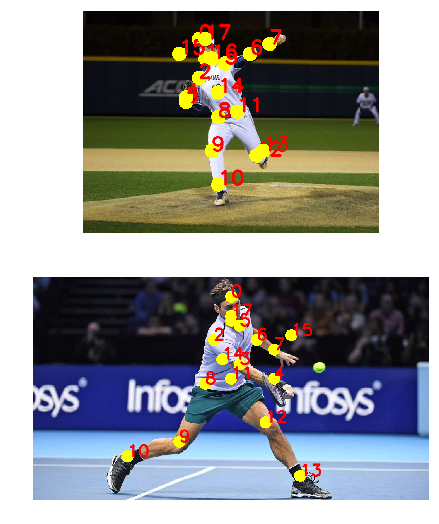

In [8]:
filenames = ['pitcher.jpg', 'federer.jpg']

draw_points(filenames, net, point_labels)